In [8]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


In [2]:
load_dotenv()


True

In [3]:
model=ChatOpenAI()

In [4]:
# Creating a StateGraph

class LLMState(TypedDict):
    input:str
    output:str
    

In [6]:
def llm_qa(state:LLMState)->LLMState:
    #Extracting the input from the state
    question=state['input']
    #form a prompt for the LLM
    prompt=f"Answer the following question {question}"

    #ask the LLM for an answer.
    answer=model.invoke(prompt).content
    #update the state with the answer and return it.
    state['output']=answer

    return state

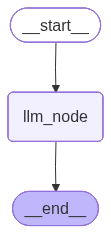

In [10]:
# Creating a StateGraph
graph=StateGraph(LLMState)

# Adding a node to the graph
graph.add_node('llm_node',llm_qa)
# Adding edges to the graph
graph.add_edge(START,'llm_node')
graph.add_edge('llm_node',END)

#Compiling the graph into a workflow
workflow=graph.compile()
workflow 

In [13]:
#Executing the workflow

initial_state={'input':'Who is Syed John Elia'}

final_state=workflow.invoke(initial_state)
print(final_state['output'])

Syed John Elia was a renowned Urdu poet, philosopher, scholar, and critic from Pakistan. He is considered one of the greatest Urdu poets of the 20th century. Elia was known for his profound and introspective poetry that often reflected on themes of love, loss, and existentialism. His unique style and deep insights have earned him a significant following among Urdu poetry enthusiasts. Elia passed away in 2002, but his legacy continues to live on through his timeless poetry.
